# The Sparks Foundation

## Aditya Sahu

## GRIP Task 1: Prediction using Supervised ML

## Aim: To predict the score of the student based on the no. of study hours.

### Importing required libraries

In [62]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Reading data from given database/url

In [61]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)                         # 5 rows sample from our data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plot of Given Data - Relation between Hours and Scores

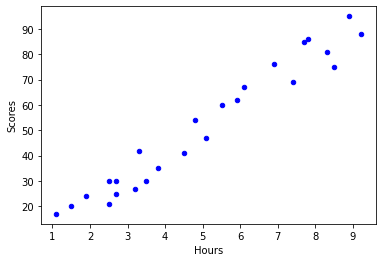

In [13]:
data.plot.scatter(x='Hours', y='Scores', c='Blue')
plt.show()

### Here we can see a approximate linear relationship, therefore to predict scores we can use linear regression

#####  In Regression, Scores are our target variable and Hours are features. So, we divide them into X and Y respectively 

In [38]:
X = (np.array(data['Hours'])).reshape(-1, 1)
Y = (np.array(data['Scores'])).reshape(-1, 1)

### Splitting Data into training and testing datasets 

In [18]:
# Training set is used to train the model and testing set is used to check our model's accuracy
# Our 75% data used in training and remaining 25% used for testing

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Model Fitting and training the Algorithm

In [40]:
model = LinearRegression().fit(X_train, Y_train)
print('Training Complete')

Training Complete


#### Equation of a straight line is (y = mx +c), where m= slope and c = intercept of line

In [45]:
slope = model.coef_
c = model.intercept_

line = slope*X + c

## Plotting Regression model line with our actual data

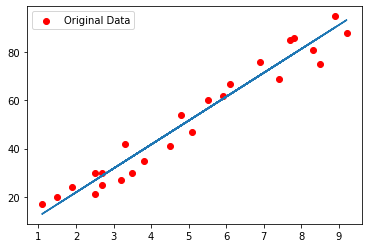

In [49]:
plt.fgure()
plt.scatter(X, Y, color="red", label="Original Data")
plt.plot(X, line)
plt.legend()
plt.show()

### Comparison of Prediction and Testing data

In [60]:
predict = model.predict(X_test)

com = pd.DataFrame()
com['Testing data'] = Y_test.flatten(order='C')
com['Predicted'] = predict.flatten(order='C')
com

,Testing data,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Evaluating Accuracy of Our Regression model

In [65]:
# calculate MAE, MSE, RMSE
print("Mean Absolute Error (MAE) ", metrics.mean_absolute_error(Y_test, predict))    
print("Mean Squared Error (MSE) ", metrics.mean_squared_error(Y_test, predict))
print("Root Mean Squared Error (RMSE) ", np.sqrt(metrics.mean_squared_error(Y_test, predict)))

Mean Absolute Error (MAE)  4.130879918502486
Mean Squared Error (MSE)  20.33292367497997
Root Mean Squared Error (RMSE)  4.5092043283688055


### What will be predicted score if a student studies for 9.25 hrs/ day?

### Here,  we predict the score corresponding to hours = 9.25

In [73]:
Predicted_score = model.predict([[9.25]])
print("Predicted Score = ", Predicted_score[0])

Predicted Score =  [93.89272889]
